In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
class HebbianMirrorNeuronAgent:
    def __init__(self, learning_rate=2**(0.5)-1,cooperation_rate=0.8):
        self.actions = ["Cooperate", "Defect"]

        self.weights = {"Cooperate": cooperation_rate, "Defect": 1-cooperation_rate}  # Initial Cooperation rate

        self.learning_rate = learning_rate  # η (Eta), learning_rate: Determines how fast associations strengthen.

    def observe_and_learn(self, human_action):
        """
        Hebbian Learning Update: Strengthens the connection between observed human action
        and chosen agent action.
        """
        # Hebbian rule:
        self.weights[human_action] += self.learning_rate * (self.weights[human_action])

        # Normalize weights to prevent explosion, Concave
        total = self.weights["Cooperate"] + self.weights["Defect"]
        self.weights["Cooperate"] /= total
        self.weights["Defect"] /= total

    def select_action(self):
        """
        Select an action based on the current Hebbian weights.
        """
        return np.random.choice(self.actions, p=[self.weights["Cooperate"], self.weights["Defect"]])


def play_static_game(agent, human_action):
    agent_action = agent.select_action()
    agent.observe_and_learn(human_action)
    return agent_action

def play_sequential_game(agent, human_action):
    agent.observe_and_learn(human_action)
    agent_action = agent.select_action()
    return agent_action


In [ ]:
def simulate(agent, human_policy, rounds=100, sequential=True):
    coop_probs = []
    for _ in range(rounds):
        # Choose game type
        if sequential:
            action = play_sequential_game(agent, human_policy())
        else:
            action = play_static_game(agent, human_policy())
        coop_probs.append(agent.weights["Cooperate"])
    return coop_probs

# Human always cooperates
def always_cooperate(): return "Cooperate"
# Human always defects
def always_defect(): return "Defect"
# Human is random
def random_human(): return random.choice(["Cooperate", "Defect"])

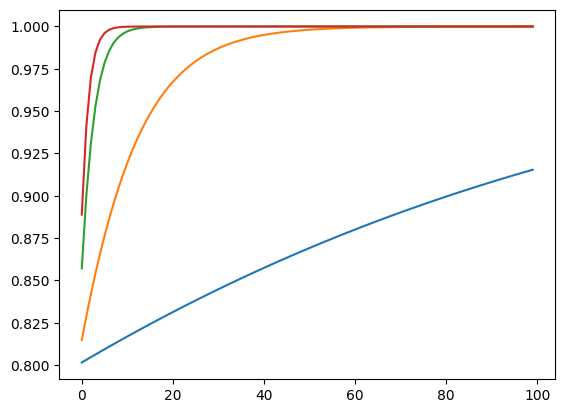

In [ ]:
for eta in [0.01, 0.1, 0.5, 1.0]:
    agent = HebbianMirrorNeuronAgent(learning_rate=eta)
    coop = simulate(agent, always_cooperate)
    plt.plot(coop, label=f'η = {eta}')


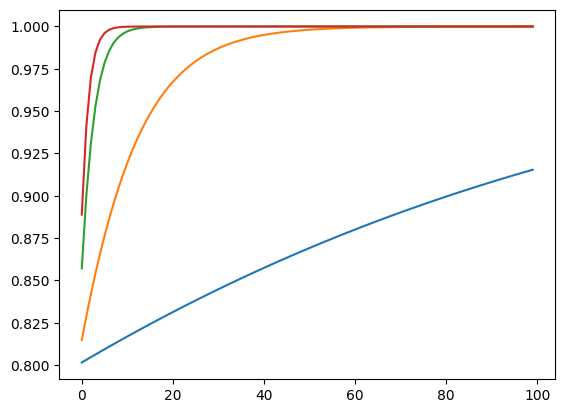

In [ ]:
for eta in [0.01, 0.1, 0.5, 1.0]:
    agent = HebbianMirrorNeuronAgent(learning_rate=eta)
    coop = simulate(agent, always_cooperate,sequential=False)
    plt.plot(coop, label=f'η = {eta}')

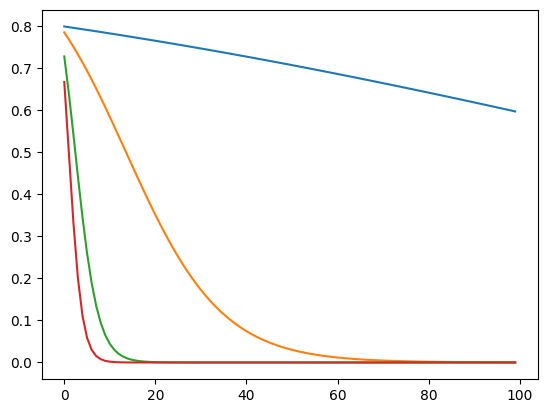

In [ ]:
for eta in [0.01, 0.1, 0.5, 1.0]:
    agent = HebbianMirrorNeuronAgent(learning_rate=eta)
    coop = simulate(agent, always_defect)
    plt.plot(coop, label=f'η = {eta}')

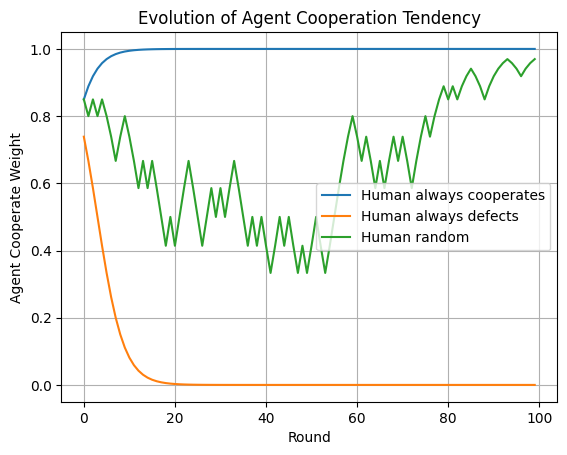

In [ ]:
agent1 = HebbianMirrorNeuronAgent()
agent2 = HebbianMirrorNeuronAgent()
agent3 = HebbianMirrorNeuronAgent()

coop1 = simulate(agent1, always_cooperate)
coop2 = simulate(agent2, always_defect)
coop3 = simulate(agent3, random_human)

plt.plot(coop1, label='Human always cooperates')
plt.plot(coop2, label='Human always defects')
plt.plot(coop3, label='Human random')
plt.xlabel('Round')
plt.ylabel('Agent Cooperate Weight')
plt.legend()
plt.title('Evolution of Agent Cooperation Tendency')
plt.grid()
plt.show()


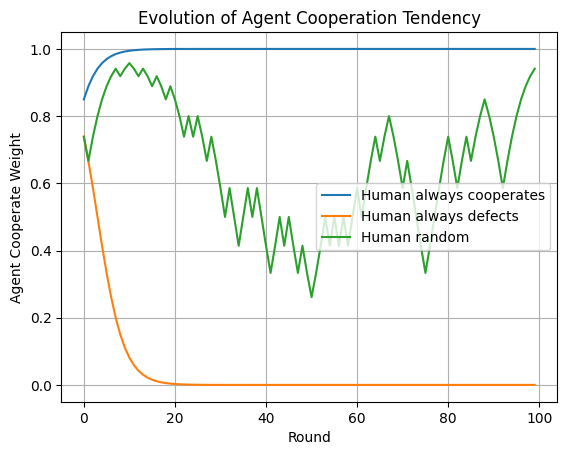

In [ ]:
agent1 = HebbianMirrorNeuronAgent()
agent2 = HebbianMirrorNeuronAgent()
agent3 = HebbianMirrorNeuronAgent()

coop1 = simulate(agent1, always_cooperate,sequential=False)
coop2 = simulate(agent2, always_defect,sequential=False)
coop3 = simulate(agent3, random_human,sequential=False)

plt.plot(coop1, label='Human always cooperates')
plt.plot(coop2, label='Human always defects')
plt.plot(coop3, label='Human random')
plt.xlabel('Round')
plt.ylabel('Agent Cooperate Weight')
plt.legend()
plt.title('Evolution of Agent Cooperation Tendency')
plt.grid()
plt.show()

In [ ]:
agent = HebbianMirrorNeuronAgent()
while(True):
    user_action =  __builtins__.input("Enter your action (Cooperate/Defect): ")
    agent_action = play_static_game(agent,user_action)
    print(f" User Action = {user_action}, Agent1 Action = {agent_action}")
    print(f"Updated Weights: {agent.weights}\n")